In [2]:
require('ggplot2') || install.packages('ggplot2', dependencies = TRUE)
require('BiocManager') || install.packages('BiocManager', dependencies = TRUE)
require('ggtree') || BiocManager::install('ggtree')

Loading required package: ggplot2



[1] TRUE

Loading required package: BiocManager



[1] TRUE

Loading required package: ggtree

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628





[1] TRUE

In [22]:
tree <- read.tree("temp.fasta.tree")

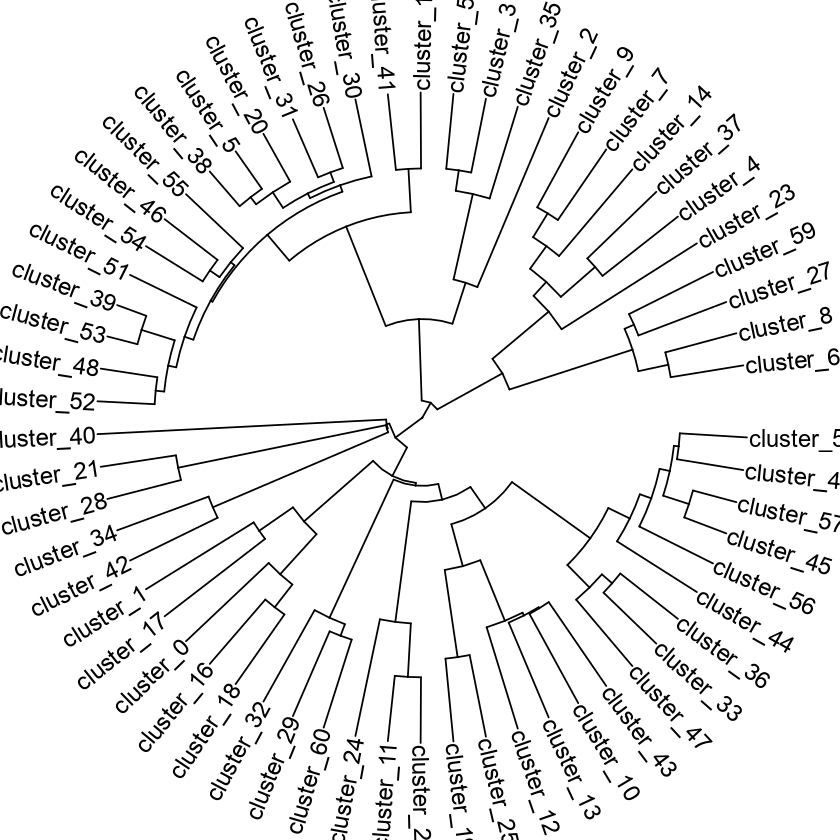

In [26]:
p <- ggtree(tree, layout='circular') + 
    geom_tiplab(size = 5, align=TRUE, linesize=.25)

plot(p)
ggsave("test.pdf", width = 50, height = 50, units = "cm", limitsize = FALSE)

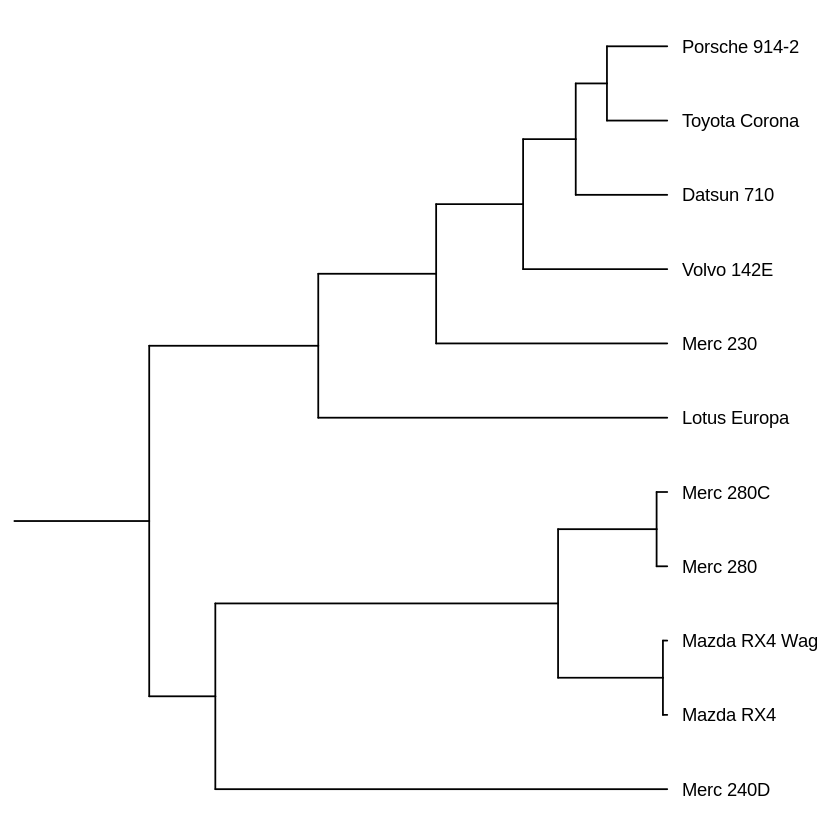

In [8]:
viewClade(p, MRCA(p, c("Merc 230", "Merc 280C")))

In [20]:
tree <- read.tree("tree_newick.nwk")
tree


Phylogenetic tree with 13 tips and 12 internal nodes.

Tip labels:
  A, B, C, D, E, F, ...

Rooted; includes branch lengths.

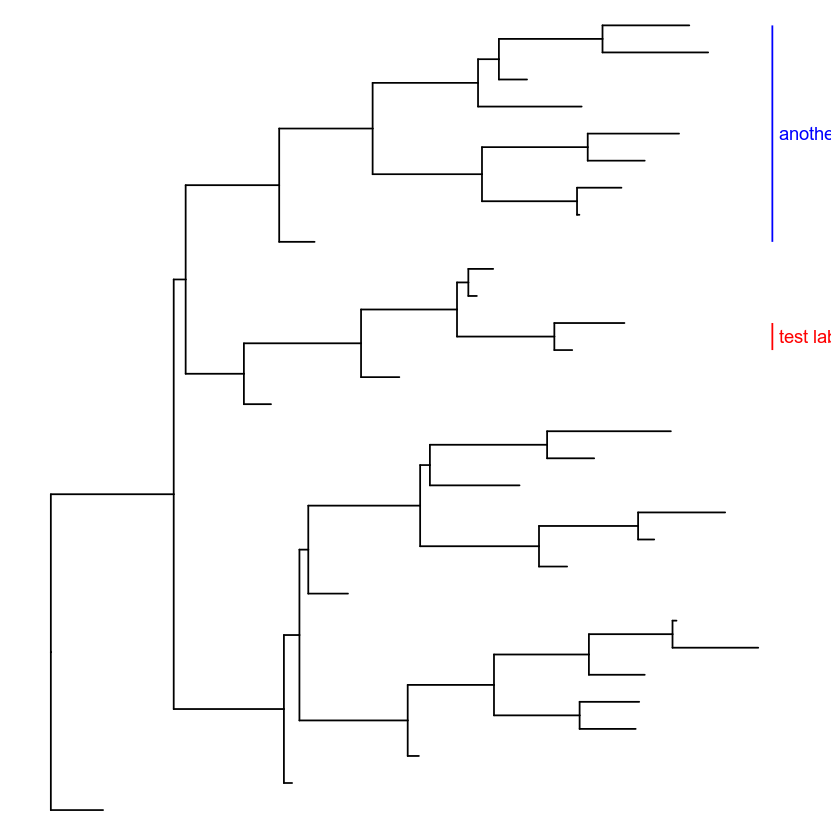

In [28]:
set.seed(2015-12-21)
tree2 = rtree(30)
p <- ggtree(tree2) + xlim(NA, 6)
p + geom_cladelabel(node=45, label="test label", align=T, color='red') +
    geom_cladelabel(node=34, label="another clade", align=T, color='blue')

In [26]:
library("ape")
#library("Biostrings")
library("ggplot2")
library("ggtree")
nwk <- system.file("extdata", "sample.nwk", package="ggtree")
tree <- read.tree(nwk)
tree

Warning message in read.tree(nwk):
“empty character string.”


NULL